# TensorFlow Tutorial: Autoencoder for Dimensionality Reduction

### Author: Ivan Bongiorni, Data Scientist at GfK.

[LinkedIn profile](https://www.linkedin.com/in/ivan-bongiorni-b8a583164/), personal email: ivanbongiorni@gmail.com




## 0. Summary



1.   What are Autoencoders?
2.   Why would you need Autoencoders?
3.   Implementation



## 1. What are Autoencoders?

This tutorial is about a very specific form of Neural Networks: **Autoencoders**.  

There are several kinds of Autoencoders around, such as denoising Autoencoders, and generative models (variational Autoencoders and GANs); they are all meant to accopmlish very specific and different tasks. In this tutotrial, I'll focus on probably the simplest of all: dimensionality reduction. Autoencoders for dimensionality reduction can be conceived as the Neural Network-equivalent of Principal Component Analysis.

The purpose of this class fo models is neither to learn how to classify observations, nor to predict a continuous output, but to compress, or simplify a dataset. For this reason, Autoencoders for dimensionality reduction are unseupervised models, instead of mainstream Deep Learning models. All the data that pass through an Autoencoder are unlabeled.




### Structure

If I had to explain an Autoencoder to my grand mother, I'd do it like this: it can be seen as a couple of funnels joined by the tip: in order to make data must flow from one extreme to the other, you must force them through the bottleneck in the middle.



More formally, it can be described as follows:

![alt text](https://cdn-images-1.medium.com/max/800/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

(image from [towardsdatascience](https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798))

It is composed of two parts, an **Encoder** and a **Decoder**. The goal of the Encoder is to "compress" the dataset, representing its features with a number of nodes/variables that is narrower than the output layer; the goal of the Decoder is to learn how to reproduce, from the central encoded layer, the initial input values. Autoencoder are thus meant to reproduce the input data on the other extreme as accurately as possible.

At this point, you have the right to be puzzled. The first time I've read about this architecture, I was like "Wait a minute, what's the point of all that?!". And in fact, it's completely pointless. But reproducing the same dataset on the other side of the Network is a trick that allows for a dimensionality reduction.

The fact that the central hidden layers is narrower than the extremes forces the network to find the most efficient way to represent, at that layer, the same data in a more compressed form. The data that flow through that central layer can be seen as a form of dimensionality reduction.

## 2. Why would you need Autoencoders?

Why would you need dimensionality reduction?

As you have probably learned from PCA, dimensionality reduction techniques are particularly useful when dealing with very complex and/or multicollinear datasets. Thanks to the "simplification" they perform, it is also possible to train Machine Learnign models on datasets otherwise too big for your run-down old laptop (joking).

### Ok, but why not good old PCA?

The advantages of this kind of Neural Network architecture over the more classical PCA is that with an Autoencoder you can potentially capture any non-linear pattern of your data. From PCA instead, you can extract factors that are only linearly associated with your actual variables, making the process of dimensionality reduction much more "rigid".

## 3. Implementation



### Import data from UCI ML repository

The purpose of this dataset is to reduce the dimensionality of the breast cancer dataset. cases between **malignant** (**M**), and **benign** (**B**). Therefore, my classification network will have two output nodes.

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", sep=",", header=None)

### Dataprep

Data preprocessing for Autoencoder require less effort than canonical Neural Networks. First, there is no need to split the data in train and test set, since my goal is just to produce a compressed version of the same dataset. Second, data do not require any labeling; we are in the field of unsupervised Machine Learning.

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# I don't need the first two columns:
# the first is an id, the other is the target variable ('M'/'B')
df = df.iloc[:,2:]

# Turn the dataframe into a numpy object
df = df.values


In [0]:
# Normalize the data - this time there is no need to use sklearn's StandardScaler() but you can use it if you want
def normalize(x):
    normalized = (x - np.mean(x))/(np.std(x))
    return normalized

for i in range(df.shape[1]):
    df[:,i] = normalize(df[:,i])

### Architecture

Given the shape of my dataframe:

In [0]:
df.shape

(569, 30)

I must now choose an Autoencoder architecture. I want to compress a `(569, 30)` shaped dataset to a `(569, 10)` encoded version. This is an arbitrary choice. In real datascience problems the chioce depends from the nature of your specific dataset (and your specific needs), there is no general rule to determine the right number of encoded variables to be obtained.


In [0]:
# I choose the size of each layer

n_input_layer = df.shape[1]
n_hidden1 = 30
n_hidden2 = 15
n_hidden3 = 15

n_encoding_layer = 10

n_hidden5 = 15
n_hidden6 = 15
n_hidden7 = 30
n_output_layer = n_input_layer  # of course, the output layer must be of the same size of the input layer

As you can see, the architecture of the Network si perfectly symmetric. Of course, Encoder and Decoder don't need to be the exact mirror image of each other.

First, I must create *one* placeholder to feed the data in:

In [0]:
# Placeholders are kind of "empty variables" in a TF computational graph.
# I will feed the actual data through them - in the graph, they are like entry doors for my data

X = tf.placeholder(tf.float32, shape = [None, df.shape[1]], name='X')

This time we don't need placeholder y, since prediction and classification are off topic here. Our model doesn't require any dependent variable to be explained.

In [0]:
from tensorflow.contrib.layers import fully_connected  # import the layers' function



Input_layer = fully_connected(X, n_input_layer, activation_fn=tf.nn.leaky_relu, scope="input_layer")

hidden1 = fully_connected(Input_layer, n_hidden1, activation_fn=tf.nn.leaky_relu, scope="hidden_layer1")

hidden2 = fully_connected(hidden1, n_hidden2, activation_fn=tf.nn.leaky_relu, scope="hidden_layer2")

hidden3 = fully_connected(hidden2, n_hidden3, activation_fn=tf.nn.leaky_relu, scope="hidden_layer3")


# This is the central layer of the Autoencoder
Encoding_layer = fully_connected(hidden3, n_encoding_layer, activation_fn=tf.nn.leaky_relu, scope="encoding_layer")


hidden5 = fully_connected(Encoding_layer, n_hidden5, activation_fn=tf.nn.leaky_relu, scope="hidden_layer5")

hidden6 = fully_connected(hidden5, n_hidden6, activation_fn=tf.nn.leaky_relu, scope="hidden_layer6")

hidden7 = fully_connected(hidden6, n_hidden7, activation_fn=tf.nn.leaky_relu, scope="hidden_layer7")

Output_layer = fully_connected(hidden7, n_output_layer, activation_fn=tf.nn.leaky_relu, scope="output_layer")


Now that the Network's structure is ready, let me define other hyperparameters:

In [0]:
# set number of epochs
n_epochs = 5000

# set learning rate
learning_rate = 0.001

The implementation of the loss function deserves attention.

As I already explained above, the implementation of an Autoencoder doesn't require a dependent variable (nor its specific placeholder). For this reason, our loss function will not contain any "y". We only need to train the Autoencoder to behave as such, that is, to replicate the input data at the output layer. It's almost like comparing the initial dataset with a copy of itself.


In [0]:
# implement Mean Squared Error
loss = tf.reduce_mean(tf.square(X - Output_layer))

In [0]:
# Define the TensorFlow operation that trains the model
training_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

### Training

In [0]:
saver = tf.train.Saver()   # set a saver for saving the model at checkpoints

In [0]:
loss_history = []    # I want to monitor the loss through time

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())   # turns on the machine
    
    
    for epoch in range(n_epochs):
        
        sess.run(training_op, feed_dict={X: df})    # we have only X to feed, that is the dataset that we want to compress.
        
        current_loss = sess.run(loss, feed_dict={X: df})  # store the loss at each iteration
        loss_history.append(current_loss)
        
        # Print the status of our Gradient Descent every 100 epochs
        if epoch % 100 == 0:
            print(str(epoch+1) + ". Loss: " + str(current_loss) + ",")
    
    # At the end of the training, you can save the model if you want
    save_path = saver.save(sess, "./autoencoder_1.ckpt")
    
    # In this case, I want to use it right away, therefore I immediately save the encoded version of my
    # It is done by taking the compress data from the central layer
    encoded_dataframe = Encoding_layer.eval(feed_dict={X: df})   # the .eval argument is another way of getting the value of a tensor at some node
    
    print()
    print("Encoding complete.")


1. Loss: 0.99262094,
101. Loss: 0.41691995,
201. Loss: 0.3260689,
301. Loss: 0.27633584,
401. Loss: 0.2104583,
501. Loss: 0.17014599,
601. Loss: 0.14291686,
701. Loss: 0.12853236,
801. Loss: 0.119778134,
901. Loss: 0.110465385,
1001. Loss: 0.0985637,
1101. Loss: 0.090854734,
1201. Loss: 0.086306006,
1301. Loss: 0.08299174,
1401. Loss: 0.08068939,
1501. Loss: 0.07875693,
1601. Loss: 0.07702099,
1701. Loss: 0.07558731,
1801. Loss: 0.074517354,
1901. Loss: 0.07346491,
2001. Loss: 0.07234934,
2101. Loss: 0.07148471,
2201. Loss: 0.07074828,
2301. Loss: 0.06996434,
2401. Loss: 0.06903634,
2501. Loss: 0.068289794,
2601. Loss: 0.067636795,
2701. Loss: 0.06687024,
2801. Loss: 0.065924644,
2901. Loss: 0.065062016,
3001. Loss: 0.06418239,
3101. Loss: 0.06324721,
3201. Loss: 0.06251593,
3301. Loss: 0.061682336,
3401. Loss: 0.060844626,
3501. Loss: 0.06006871,
3601. Loss: 0.059311606,
3701. Loss: 0.05862759,
3801. Loss: 0.0579947,
3901. Loss: 0.057262428,
4001. Loss: 0.056626443,
4101. Loss: 0.0560

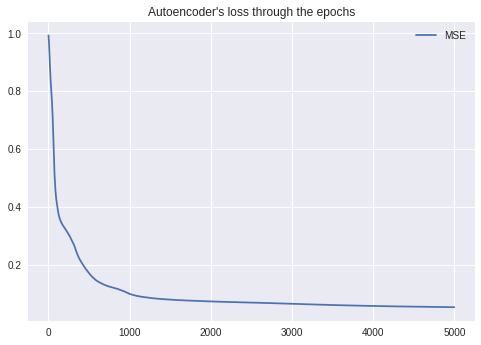

In [0]:
plt.plot(loss_history, label="MSE")
plt.title("Autoencoder's loss through the epochs")
plt.legend()
plt.show()

## Applications

Now that we have an encoded version of our initial dataset, we can use it for our Machine Learning task.

The encoded dataset is stored into a numpy array called `encoded_dataframe`, that we can turn into a pandas DataFrame:

In [0]:
# You can save it in a pandas dataframe
encoded_pandas_dataframe = pd.DataFrame(encoded_dataframe)

# Let's take a look:
encoded_pandas_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,5.950812,16.487156,7.728285,3.261057,6.443383,5.501568,11.683473,3.548657,6.374877,10.508931
std,6.478880,10.128191,4.617937,2.953408,6.955463,4.555366,8.673910,4.639213,4.217002,9.891843
min,-0.106495,0.565276,-0.185673,-1.971750,-0.214498,-0.894893,-1.230408,-5.819337,-0.267922,-2.185170
25%,1.837411,8.317730,4.729818,0.815832,1.876604,2.501072,4.820455,-0.615608,3.747824,-0.008073
50%,3.444600,14.563843,7.041510,2.875292,3.979146,4.546839,9.438953,3.218110,5.604097,10.139227
75%,8.072370,22.776043,9.779955,5.282134,8.848096,7.434040,17.366352,7.063730,8.010862,18.109919
max,38.690048,53.922176,47.080498,15.525367,39.998653,40.229443,40.605808,18.224545,45.316860,40.703217


At this point, you can train any Machine Learning model on the encoded dataframe (for example, [some feed-forward Neural Network](https://github.com/IvanBongiorni/TensorFlow_Tutorial/blob/master/TensorFlow_1_Classification_BatchGD.ipynb), as I explained in previous tutorials, or [the Mini-Batch Gradient Descent version of it](https://github.com/IvanBongiorni/TensorFlow_Tutorial/blob/master/TensorFlow_2_Classification_MiniBatchGD.ipynb), why not).

You'll find that computational times will be much slower, and with very similar results. In case of very multicollinear datasets, you might even find a significant improvement in your model performance.
